In [2]:
# Biblioteker
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [3]:
# Konstanter
g = 9.81
m = 0.0301
c = 2/5
r = 0.020

In [4]:
# Utregning av bane
festepunkter_x = np.arange(0, 1400+200, 200)
festepunkter_y = np.array([300, 247, 159, 159, 195, 190, 131, 152,])

x = np.arange(0, 1400+1, 1)

cs = CubicSpline(festepunkter_x,festepunkter_y,bc_type='natural')
y = cs(x)
dy = cs(x,1)
ddy = cs(x,2)

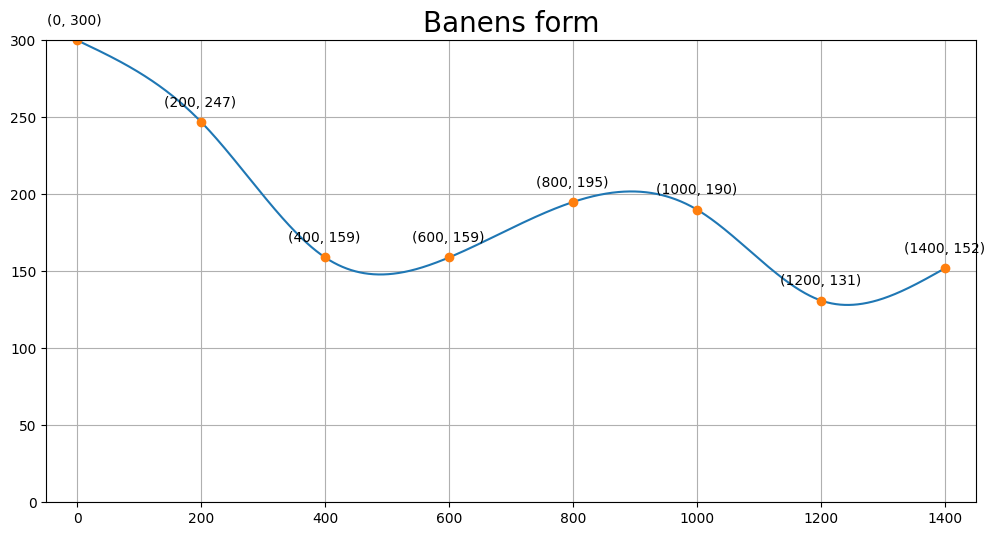

In [5]:
# Plot av banen y(x)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens form', fontsize=20)
plt.plot(x,y,festepunkter_x,festepunkter_y,'o')
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()

for i, j in zip(festepunkter_x, festepunkter_y):
   strlen = len(f"({str(i)}, {str(j)})")
   plt.text(i-strlen*6, j+10, '({}, {})'.format(i, j))

plt.show()

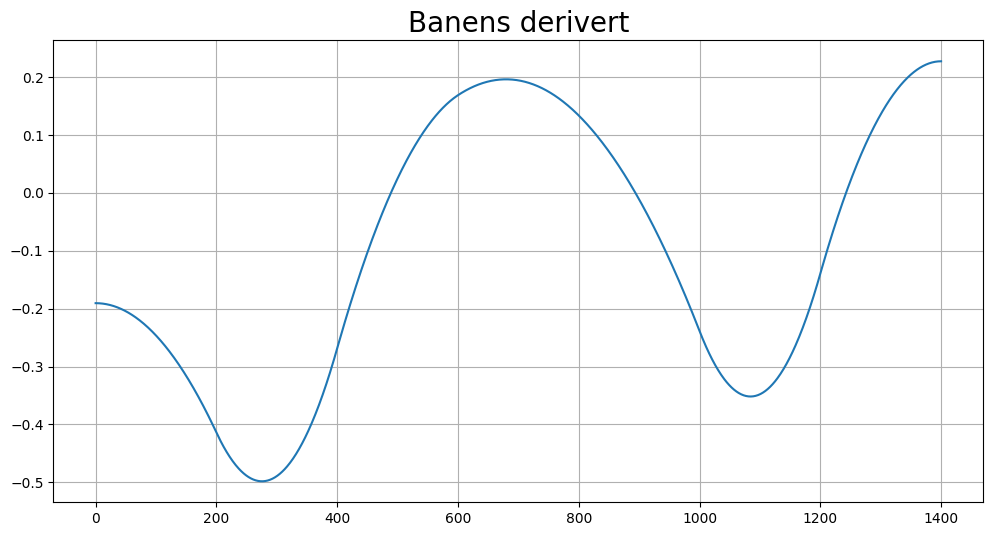

In [6]:
# Plot av derivert av bane
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens derivert', fontsize=20)
plt.plot(x,dy)
plt.grid()
plt.show()

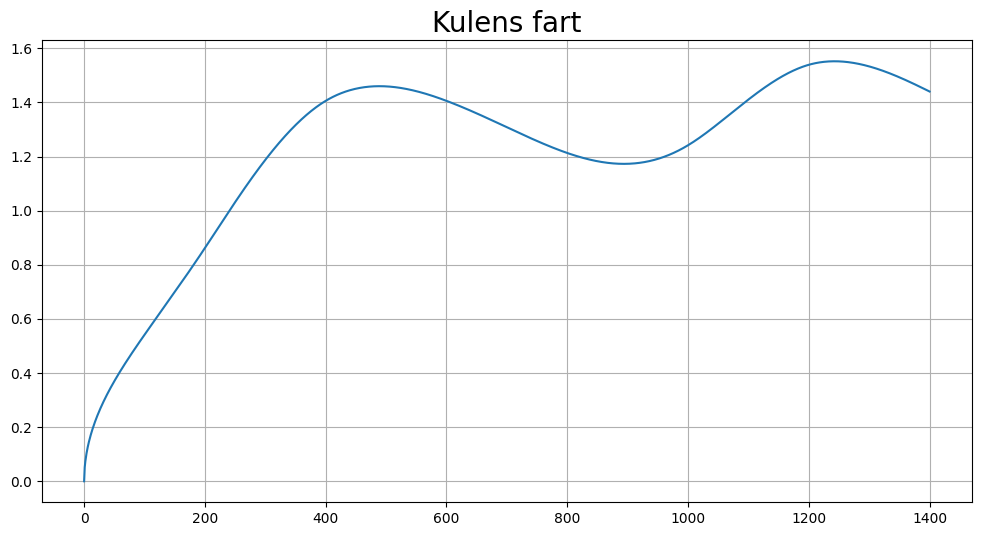

In [7]:
# Plot av kulas fart
def kfart(banehøyde):
    y0 = y[0] / 1000 # m
    return np.sqrt(2*g*(y0-(banehøyde/1000))/(1+c))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Kulens fart', fontsize=20)
plt.plot(x, kfart(y))

plt.grid()
plt.show()

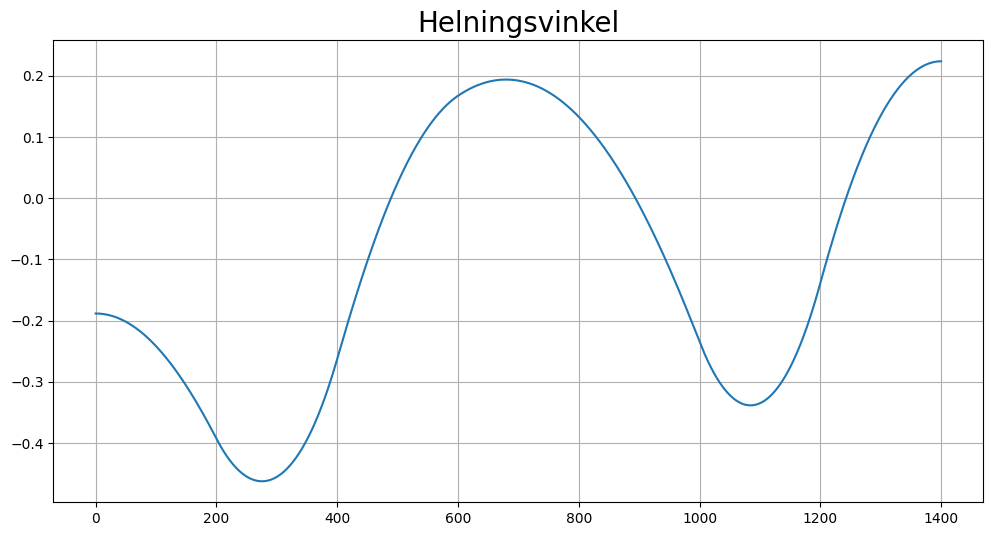

In [8]:
# Plot av helningsvinkel
def helning(dy):
    return np.arctan(dy)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Helningsvinkel', fontsize=20)
plt.plot(x, helning(dy))

plt.grid()
plt.show()

In [9]:
# Tidsutvikling
def dt(n):
    dx = 0.001 # m
    fart = kfart(y[n])
    fart_next = kfart(y[n+1])
    return (2 * dx) / ((fart + fart_next) * abs(np.cos(helning(dy[n]))))
dt_arr = [dt(i) for i in range(0, len(x)-1)]

In [10]:
# Total tid
tid = sum(dt_arr)

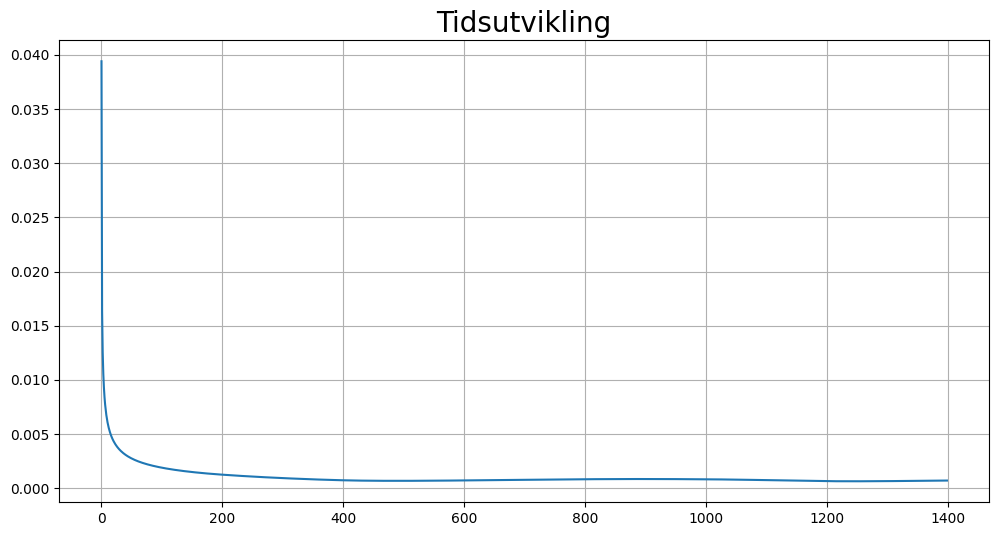

In [11]:
# Plot av tidsutvikling
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Tidsutvikling', fontsize=20)
plt.plot(x[:-1], dt_arr)
plt.grid()
plt.show()

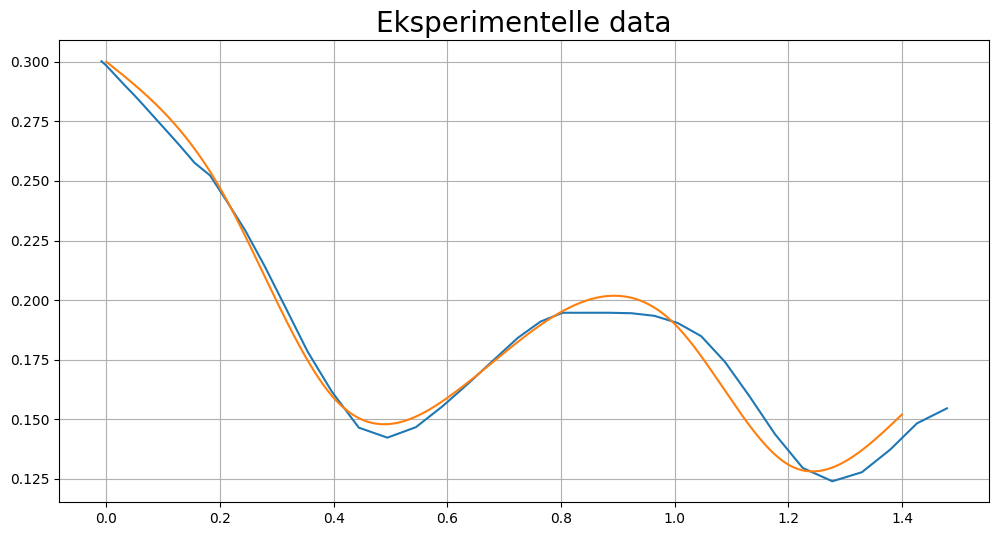

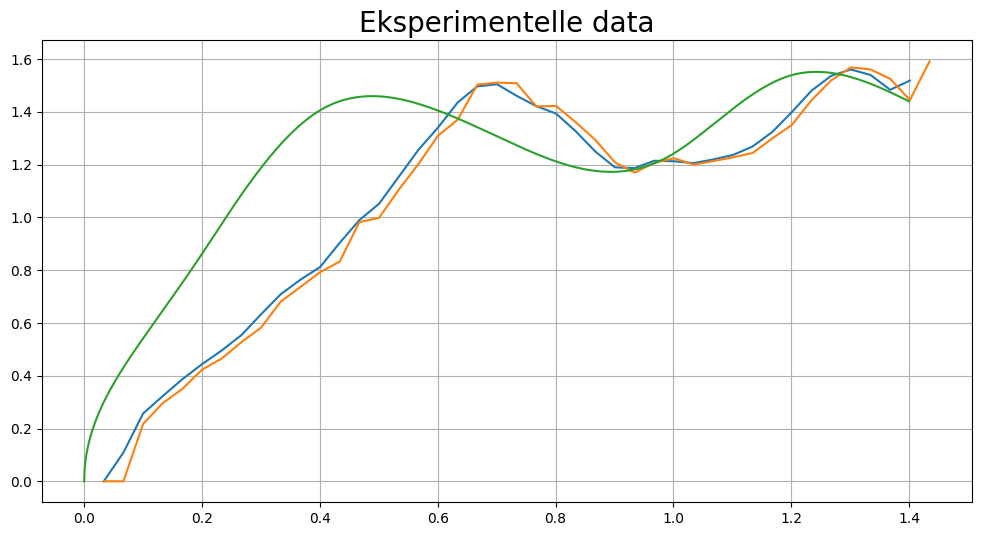

Start mechanical: 0.08864335620000001
End kinetic: 0.03472578304999999
End mechanical: 0.07851595535


In [18]:
# Hente ut fra csv
import pandas as pd
data = pd.read_csv('3242.txt', sep=';')
t_exp = data['t'].to_numpy()
x_exp = data['x'].to_numpy()
y_exp = data['y'].to_numpy()
v_exp = data['v'].to_numpy()

speed = np.array([
    np.sqrt((x_exp[i] - x_exp[i-1])**2 + (y_exp[i] - y_exp[i-1])**2) / (t_exp[i] - t_exp[i-1]) for i in range(1, len(x_exp))
])
speed = np.insert(speed, 0, 0)

# Plot av posisjon
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Eksperimentelle data', fontsize=20)
plt.plot(x_exp, y_exp, label="Experimental")
plt.plot(x/1000, y/1000, label="Theoretical")
plt.grid()
plt.show()

# Plot av fart
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Eksperimentelle data', fontsize=20)
plt.plot(t_exp, v_exp, label="Experimental")
plt.plot(t_exp, speed, label="Experimental (calculated)")
plt.plot(x/1000, kfart(y), label="Theoretical")
plt.grid()
plt.show()

# Calculate energy
def kinetic(v):
    # return (1+c)/2*m*v**2
    return 1/2 * m * v**2
def potential(y):
    return m*g*y
print(f"Start mechanical: {kinetic(v_exp[0]) + potential(y_exp[0])}")
print(f"End mechanical: {kinetic(v_exp[-2]) + potential(y_exp[-2])}")

In [13]:
# Utregning av kinetisk energi i sluttpunktet
E = (1+c)*m*kfart(y[-1]/1000)**2/2
print(E)

0.08853941728800001


In [14]:
def Normalkraft(n):
    y0 = y[0]
    sentrip = (2*g*(y0 - y[n])/(1+c)) * ddy[n]/(1+(dy[n]**2))**(3/2)
    return m*(g*np.cos(helning(dy[n]))+sentrip)

In [15]:
#Friksjonskraft
def F(n): 
    m = 0.031
    g = 9.81
    f = 2*m*g*np.sin(helning[n])/7
    if abs(f) > 0.4 * Normalkraft(n):
        return 0.4 * Normalkraft(n)
    else:
        return f

In [16]:
#Forholdet mellom friksjonskraften og normalkraften
def aFrictionousRelationship(n):
    return F(n)/Normalkraft(n)
